In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data_1/College_Admission.csv")
df

student_id  age  gender category           state preferred_stream  \
0          250.99   17   other  general          odisha       management   
1          250.99   20   other      ews         gujarat      agriculture   
2          250.99   19  female       sc   uttar pradesh         pharmacy   
3          250.99   18    male      ews       meghalaya             arts   
4          250.99   18    male       sc       rajasthan      engineering   
...           ...  ...     ...      ...             ...              ...   
24995    24750.01   18  female      obc   uttar pradesh              law   
24996    24750.01   20   other      ews  andhra pradesh       management   
24997    24750.01   17    male      obc         manipur         pharmacy   
24998    24750.01   19    male      ews  andhra pradesh       management   
24999    24750.01   17  female      ews         tripura          nursing   

      entrance_exam  entrance_score  board_percentage  extracurricular_score  \
0               cet              30             95.58                      2   
1              none               0             75.45                      2   
2               cet             120             75.36                     10   
3               cet             179             52.49                      2   
4               jee             295             92.48                      7   
...             ...             ...               ...                    ...   
24995          none               0             82.67                      2   
24996          none               0             60.66                     10   
24997           cet             195             91.87                      6   
24998           cet              66             50.44                      9   
24999          none               0             87.93                      4   

       admission_probability admission_status scholarship_eligibility  
0                      0.387         admitted                     yes  
1                      0.221         rejected                      no  
2                      0.446         rejected                      no  
3                      0.174         admitted                      no  
4                      0.634         admitted                     yes  
...                      ...              ...                     ...  
24995                  0.273         rejected                      no  
24996                  0.258         rejected                      no  
24997                  0.544         rejected                      no  
24998                  0.209         rejected                      no  
24999                  0.348         rejected                      no  

[25000 rows x 13 columns]

In [46]:
from scripts.data_preprocessing import preprocess_data

X, y = preprocess_data(
    filepath="data/College_Admission.csv",
    target_column="admission_probability"
)


In [3]:
df.describe()

student_id           age  entrance_score  board_percentage  \
count  25000.000000  25000.000000    25000.000000      25000.000000   
mean   12500.500000     18.492440       77.879760         75.028014   
std     7212.732314      1.116205      120.356125         14.438767   
min      250.990000     17.000000        0.000000         50.440000   
25%     6250.750000     17.000000        0.000000         62.550000   
50%    12500.500000     18.000000       20.000000         75.070000   
75%    18750.250000     19.000000      126.000000         87.640000   
max    24750.010000     20.000000      634.000000         99.530000   

       extracurricular_score  admission_probability  
count           25000.000000           25000.000000  
mean                4.990920               0.323997  
std                 3.158942               0.142427  
min                 0.000000               0.041990  
25%                 2.000000               0.219000  
50%                 5.000000               0.319000  
75%                 8.000000               0.419000  
max                10.000000               0.731010

In [47]:
X.to_csv("models/training_columns.csv", index=False)


In [49]:
import pickle

with open("models/scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [50]:
import os
os.listdir("models")


['regression_model.pkl', 'scaler.pkl', 'training_columns.csv']

In [51]:
with open("models/scaler.pkl", "rb") as file:
    scaler = pickle.load(file)


In [48]:
training_columns = pd.read_csv("models/training_columns.csv").columns.tolist()


<Axes: >

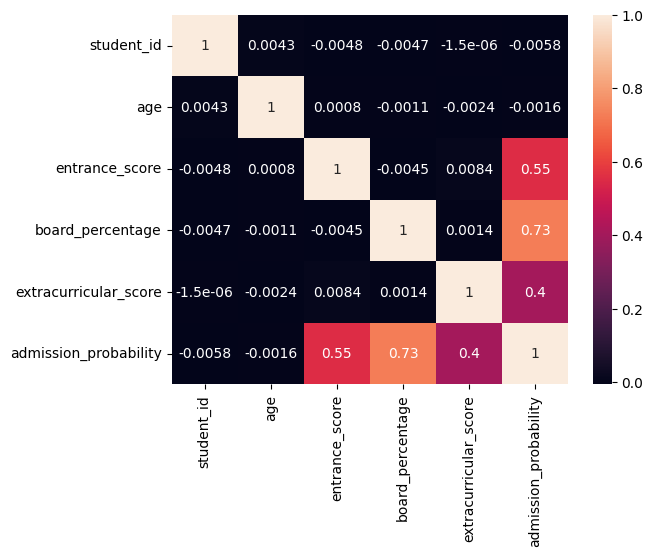

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)



In [8]:
df.isnull().sum()

student_id                 0
age                        0
gender                     0
category                   0
state                      0
preferred_stream           0
entrance_exam              0
entrance_score             0
board_percentage           0
extracurricular_score      0
admission_probability      0
admission_status           0
scholarship_eligibility    0
dtype: int64

In [9]:
pd.get_dummies(df, drop_first=True)


student_id  age  entrance_score  board_percentage  \
0          250.99   17              30             95.58   
1          250.99   20               0             75.45   
2          250.99   19             120             75.36   
3          250.99   18             179             52.49   
4          250.99   18             295             92.48   
...           ...  ...             ...               ...   
24995    24750.01   18               0             82.67   
24996    24750.01   20               0             60.66   
24997    24750.01   17             195             91.87   
24998    24750.01   19              66             50.44   
24999    24750.01   17               0             87.93   

       extracurricular_score  admission_probability  gender_male  \
0                          2                  0.387        False   
1                          2                  0.221        False   
2                         10                  0.446        False   
3                          2                  0.174         True   
4                          7                  0.634         True   
...                      ...                    ...          ...   
24995                      2                  0.273        False   
24996                     10                  0.258        False   
24997                      6                  0.544         True   
24998                      9                  0.209         True   
24999                      4                  0.348        False   

       gender_other  category_general  category_obc  ...  \
0              True              True         False  ...   
1              True             False         False  ...   
2             False             False         False  ...   
3             False             False         False  ...   
4             False             False         False  ...   
...             ...               ...           ...  ...   
24995         False             False          True  ...   
24996          True             False         False  ...   
24997         False             False          True  ...   
24998         False             False         False  ...   
24999         False             False         False  ...   

       preferred_stream_management  preferred_stream_medical  \
0                             True                     False   
1                            False                     False   
2                            False                     False   
3                            False                     False   
4                            False                     False   
...                            ...                       ...   
24995                        False                     False   
24996                         True                     False   
24997                        False                     False   
24998                         True                     False   
24999                        False                     False   

       preferred_stream_nursing  preferred_stream_pharmacy  \
0                         False                      False   
1                         False                      False   
2                         False                       True   
3                         False                      False   
4                         False                      False   
...                         ...                        ...   
24995                     False                      False   
24996                     False                      False   
24997                     False                       True   
24998                     False                      False   
24999                      True                      False   

       preferred_stream_science  entrance_exam_jee  entrance_exam_neet  \
0                         False              False               False   
1                         False              False               False   
2           

In [11]:
df.columns



Index(['student_id', 'age', 'gender', 'category', 'state', 'preferred_stream',
       'entrance_exam', 'entrance_score', 'board_percentage',
       'extracurricular_score', 'admission_probability', 'admission_status',
       'scholarship_eligibility'],
      dtype='object')

In [24]:
X = df.drop(['student_id', 'admission_probability'], axis=1)
y = df['admission_probability']



In [27]:
X = pd.get_dummies(X, drop_first=True)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.009853190885212198
R² Score: 0.9952870324371795


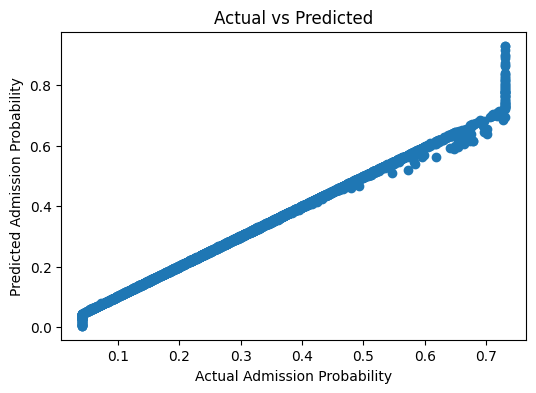

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Admission Probability")
plt.ylabel("Predicted Admission Probability")
plt.title("Actual vs Predicted")
plt.show()


In [33]:
feature_importance = pd.Series(
    model.coef_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


board_percentage           0.103834
entrance_score             0.078183
extracurricular_score      0.056595
entrance_exam_jee          0.000193
state_rajasthan            0.000130
state_tripura              0.000126
state_mizoram              0.000081
state_madhya pradesh       0.000081
state_arunachal pradesh    0.000080
state_jharkhand            0.000075
dtype: float64

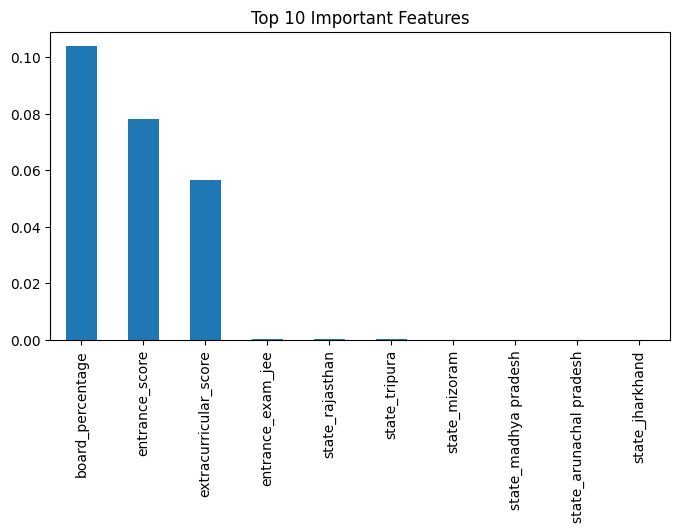

In [34]:
feature_importance.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Important Features")
plt.show()


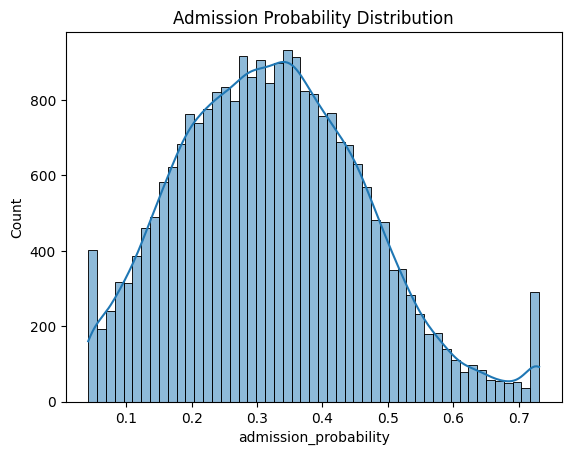

In [35]:
sns.histplot(y, kde=True)
plt.title("Admission Probability Distribution")
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("RF R²:", r2_score(y_test, rf_pred))


RF R²: 0.9988240328475138


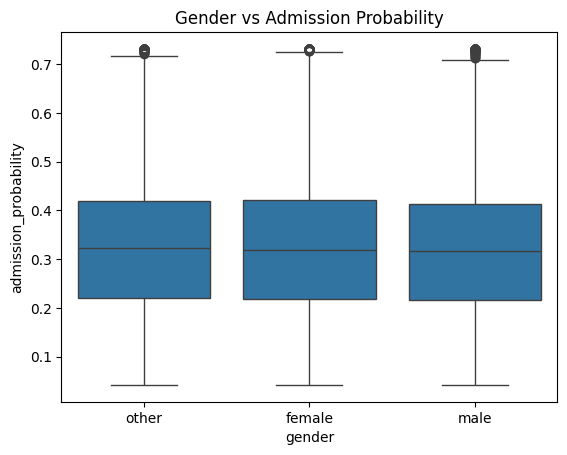

In [39]:
sns.boxplot(x='gender', y='admission_probability', data=df)
plt.title("Gender vs Admission Probability")
plt.show()


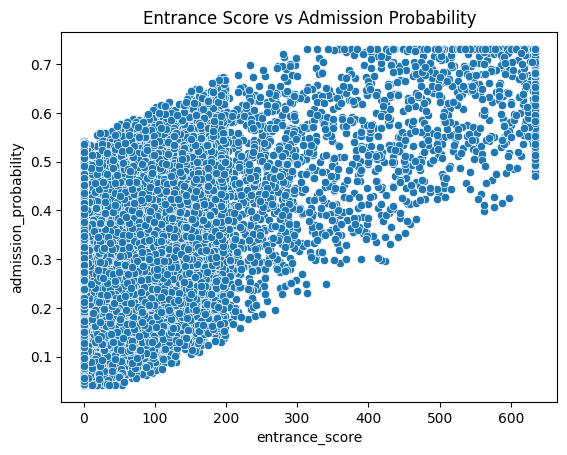

In [40]:
sns.scatterplot(
    x='entrance_score',
    y='admission_probability',
    data=df
)
plt.title("Entrance Score vs Admission Probability")
plt.show()


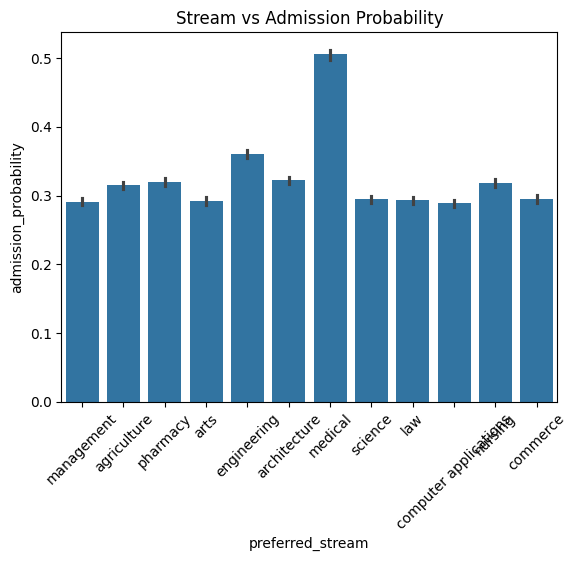

In [41]:
sns.barplot(
    x='preferred_stream',
    y='admission_probability',
    data=df
)
plt.xticks(rotation=45)
plt.title("Stream vs Admission Probability")
plt.show()


In [42]:
import pickle

with open("regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [43]:
import os
os.getcwd()


'c:\\Users\\AADITI\\Downloads\\University_Admission_Prediction\\Notebooks'

In [44]:
with open("regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [45]:
with open("models/regression_model.pkl", "wb") as file:
    pickle.dump(model, file)
